In [1]:
import numpy as np
import emcee
import seaborn as sns
import pandas as pd
import scipy
import dlsfunctions as dls
import matplotlib.pyplot as plt

In [2]:
%%latex
This Bayes Take 6 tests the current code for pydls using a unimodal, Gaussian simulated particle size distribution with a mean that is slanted towards the right of the simulated distribution. 

<IPython.core.display.Latex object>

In [3]:
r = 2.2439608235145855e-09    # in meters
diameter = r * 2
mean = diameter + 3e-9
sigma = 2e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, mean, sigma, c)

In [4]:
m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

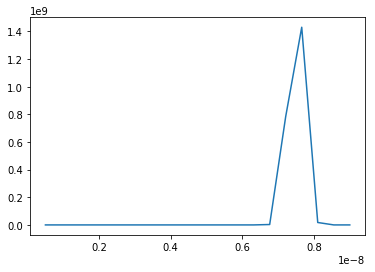

In [5]:
plt.plot(d,f_1)

In [50]:
mean

7.48792164702917e-09

In [6]:
dls.check_distribution_norm(f_1, d[1] - d[0])

1.0

In [7]:
theta_input = np.append(f_1, beta)

In [8]:
simulated_data = dls.g2(theta_input, d, m, gamma, time_in)

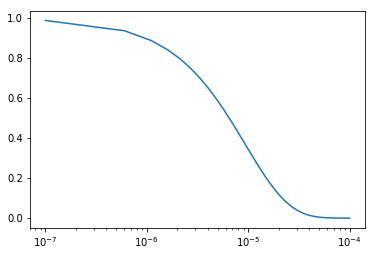

In [9]:
plt.semilogx(time_in, simulated_data)

In [10]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [11]:
start_pos = [theta_input + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [12]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data, m, gamma, time_in))

In [13]:
result = sampler.run_mcmc(start_pos, nsteps)

/usr/local/lib/python2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/usr/local/lib/python2.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


In [14]:
sampler.acceptance_fraction

array([0.326     , 0.31866667, 0.33      , 0.317     , 0.335     ,
       0.32633333, 0.33566667, 0.336     , 0.34633333, 0.32966667,
       0.333     , 0.323     , 0.316     , 0.328     , 0.34033333,
       0.32833333, 0.33833333, 0.33066667, 0.32266667, 0.32833333,
       0.32466667, 0.324     , 0.32766667, 0.31233333, 0.352     ,
       0.344     , 0.324     , 0.317     , 0.33666667, 0.342     ,
       0.32333333, 0.325     , 0.32833333, 0.347     , 0.34      ,
       0.322     , 0.32933333, 0.325     , 0.32733333, 0.32233333,
       0.32633333, 0.34266667, 0.32466667, 0.31133333, 0.32      ,
       0.32533333, 0.305     , 0.317     , 0.322     , 0.33033333,
       0.32866667, 0.323     , 0.32333333, 0.33733333, 0.33466667,
       0.32266667, 0.32566667, 0.34133333, 0.34333333, 0.32566667,
       0.33333333, 0.30733333, 0.328     , 0.32033333, 0.337     ,
       0.328     , 0.33      , 0.323     , 0.326     , 0.327     ,
       0.34      , 0.32433333, 0.32133333, 0.33566667, 0.32766

In [15]:
# this is not good let's check forward calculations
dls.log_prior(theta_input, m)

-9.892998328563087e+17

In [16]:
dls.log_likelihood(theta_input, d, simulated_data, m, gamma, time_in)

-0.0

In [ ]:
dls.log_posterior(theta_input, d, simulated_data, m, gamma, time_in)

In [16]:
# forward calculations checked out, I don't know why the 
# acceptance fractions turned out so badly

In [ ]:
# ok now they're fine but the acceptance fraction is still low

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


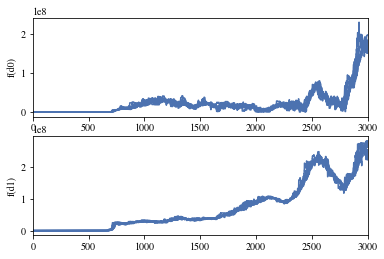

In [17]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

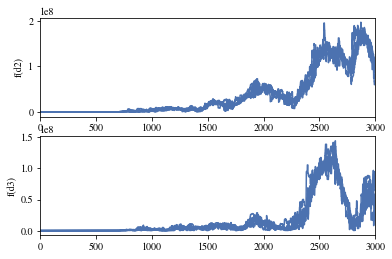

In [18]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

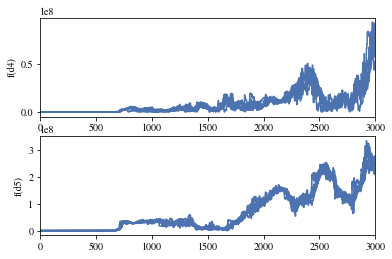

In [19]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax4, ax5) = plt.subplots(2)
ax4.set(ylabel='f(d4)')
ax5.set(ylabel='f(d5)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 4], ax=ax4)
    sns.tsplot(sampler.chain[j, :, 5], ax=ax5)

In [33]:
samples = sampler.chain[:,2300:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta':traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [34]:
q

,beta,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),...,f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.16,0.291727,1.673088e+07,1.367797e+08,3.573855e+07,3.895372e+07,8.528639e+07,1.190938e+08,1.255445e+08,7.446208e+08,1.422702e+09,...,2.214190e+08,1.791342e+08,6.807191e+07,1.988109e+07,8.321454e+06,1.151614e+08,5.367527e+06,5.277216e+07,9.817994e+06,9.804196e+06
0.50,0.808516,3.568718e+07,1.782721e+08,9.153829e+07,6.243845e+07,1.461313e+08,1.623637e+08,1.915956e+08,7.817718e+08,1.458118e+09,...,2.766299e+08,2.747989e+08,1.224397e+08,5.914358e+07,2.066505e+07,1.575914e+08,1.624965e+07,9.083367e+07,2.996937e+07,2.098370e+07
0.84,1.432170,9.823971e+07,2.274417e+08,1.520602e+08,1.774500e+08,2.395685e+08,2.070292e+08,2.506447e+08,8.381831e+08,1.480855e+09,...,3.284576e+08,3.430299e+08,1.513153e+08,1.044478e+08,3.638344e+07,2.356783e+08,3.513498e+07,1.324550e+08,4.422451e+07,6.937088e+07


In [24]:
fifty_q = np.zeros(20)
fifty_q[0] = 3.5687e7
fifty_q[1] = 1.783e8
fifty_q[2] = 1.224e8
fifty_q[3] = 5.914e7
fifty_q[4] = 2.067e7
fifty_q[5] = 1.58e8
fifty_q[6] = 1.625e7
fifty_q[7] = 9.083e7
fifty_q[8] = 2.99e7
fifty_q[9] = 2.098e7
fifty_q[10] = 9.154e7
fifty_q[11] = 6.244e7
fifty_q[12] = 1.4613e8
fifty_q[13] = 1.624e8
fifty_q[14] = 1.916e8
fifty_q[15] = 7.818e8
fifty_q[16] = 1.458e9
fifty_q[17] = 4.8371e7
fifty_q[18] = 2.766e8
fifty_q[19] = 2.748e8

Text(0.5,1,'Inferred Distribution')

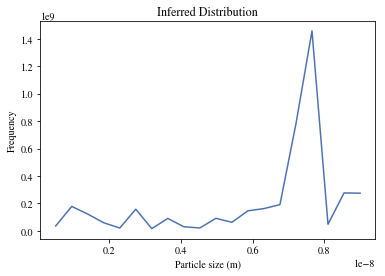

In [25]:
plt.plot(d, fifty_q)
plt.xlabel('Particle size (m)')
plt.ylabel('Frequency')
plt.title('Inferred Distribution')

Text(0.5,1,'Actual simulated distribution')

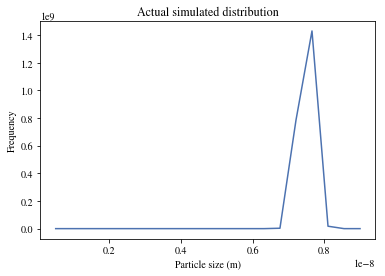

In [26]:
plt.plot(d, f_1)
plt.xlabel('Particle size (m)')
plt.ylabel('Frequency')
plt.title('Actual simulated distribution')

In [45]:
beta_fifty = 0.29

In [46]:
theta_inferred = np.append(fifty_q, beta_fifty)

In [47]:
g2_from_inference = dls.g2(theta_inferred, d, m, gamma, time_in)

Text(0.5,1,'g2 from inferred distribution')

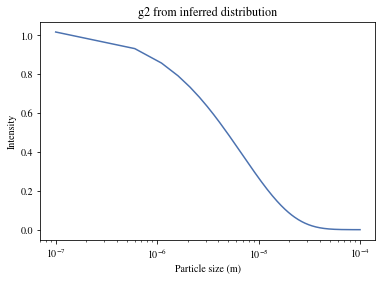

In [48]:
plt.semilogx(time_in, g2_from_inference)
plt.xlabel('Particle size (m)')
plt.ylabel('Intensity')
plt.title('g2 from inferred distribution')

Text(0.5,1,'Residual plot')

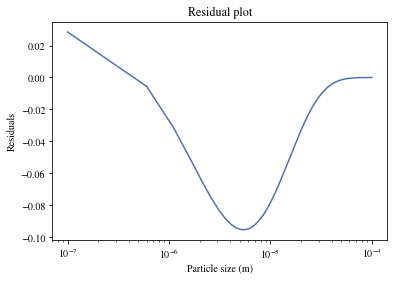

In [49]:
plt.semilogx(time_in, g2_from_inference - simulated_data)
plt.xlabel('Particle size (m)')
plt.ylabel('Residuals')
plt.title('Residual plot')